In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G,c
from astropy.constants import M_sun
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
font = {'family': 'sans-serif', 'color':  'black', 'weight': 'normal', 'size': 10}

In [3]:
# Basic parameters for the pulsar from the ephemeris reported 

Pb = 7.447896658*24*3600        # Orbital period in seconds
T0 = 4.925490947e-6
e =  0.7079323                    # Eccentricity of system
x = 27.819                    # Projected semi-major axis
n = (2*(np.pi))/Pb                   # In s^-1

r2d = 180/np.pi
d2r = np.pi/180


In [4]:
# Generating a couple of arrays for pulsar and companion masses
# Lowest pulsar mass used according to lowest known NS mass

mp_loop = np.arange(1.1,4,(4-1.1)/200)
mc_loop = np.arange(1.0,60,(60-1.0)/700)

Calculating maximum contribution to the rate of advance of periastron (omega-dot) value from the Lense-Thirring (LT) precession of a NS/BH companion (omd_val). For a range of pulsar and companion masses, the term Bc_val is calculated, this depends on the component masses and the companion's spin angular momentum. The factor f_c is a multiplication factor whose maxima is dependent on the inclination angle of the system. The omega-dot from LT precession is calculated as omd_val (using equation 14), and the maximum contribution to the observed value is obtained with the term ratio_val. 

In [5]:
# Function to calculate the maximum omega-dot from LT 

def calc_kso(mp=[],mc=[]):
    mp_k = []
    mc_k = []
    mc_na = []
    omdso = []
    ratio_val = []
    fc_val = []
    mp_logscale = []
    mc_logscale =[]
    for mp_val in mp:
        coeff_32 = (1-e*e)**(3.0/2.0) 
        for mc_val in mc:
            M_T = mp_val+mc_val
            S_c = G*((mc_val*M_sun.value)**2)/c
            M_T = M_T * (M_sun.value)
            coeff_1 = 4 + 3*(mp_val/mc_val)
            coeff_2 = n*S_c
            coeff_31 = 2*(c**2)*(M_T)
            Bc_val = (coeff_1*coeff_2)/(coeff_31*coeff_32)
            temp_1 = (4*(np.pi**2)*(x**3))/(T0*(Pb**2))
            sini = (temp_1*((mp_val+mc_val)**2)/mc_val**3)**(1./3)
            f_c = np.sqrt(4 +((1-sini**2)/(sini**2)))
            fc_val.append(f_c)
            k_val = (f_c*Bc_val)
            omd_val = k_val*n*365.25*24*3600*r2d*100              # Changed omega-dot value to deg/yr
            omd_theo_rads = 3*(T0**(2.0/3))*((Pb/(2*np.pi))**(-5.0/3))*(1/(1-e**2))*((mc_val+mp_val)**(2.0/3))
            omd_theo_degyr = omd_theo_rads*365.25*24*3600*r2d     # Changed observed omega-dot to deg/yr
            ratio_val.append(omd_val/omd_theo_degyr)              # Ratio of LT-contribution and observed values
            omdso.append(omd_val)
            mp_k.append(mp_val)
            mc_k.append(mc_val)   
            mp_logscale.append(np.log10(mp_val))                  
            mc_logscale.append(np.log10(mc_val))
    return omdso,fc_val,ratio_val,mp_k,mc_k,mp_logscale,mc_logscale
            
omd_spinorb, fc_value, ratio_value, pul_val, comp_val, log_pulmass,log_compmass = calc_kso(mp_loop,mc_loop)

In [6]:
# Calculating maximum value of the factor |f_c| over the whole range of Mp-Mc masses

max_fc_value = np.max(fc_value)
# print(max_fc_value)


# Calculating maximum contribution from LT precession to the theoretical monopole-value

max_contri = np.max(ratio_value)
print(max_contri)

0.7209868080183246


### For plotting the observed omega-dot line

In [7]:
# Omega-dot (with 1-sigma error) in deg/yr

omdot = 0.03468 
omdot_unc = 0.00003

omdot_plus = omdot + omdot_unc
omdot_minus = omdot - omdot_unc

# Omega-dot in rad/s
omdot_rads = omdot*np.pi/(180*365*24*60*60)

omdot_rads_plus=omdot_plus*np.pi/(180*365*24*60*60)
omdot_rads_minus=omdot_minus*np.pi/(180*365*24*60*60)

Calculating total mass of the system from omega-dot, and deriving the companion masses for the range of pulsar masses from the total mass value. 

In [8]:
mtot_omdot = (omdot_rads*(1-e*e)*(Pb/(2*np.pi))**(5./3)/(3*T0**(2./3)))**(3./2)
mtot_omdot_plus = (omdot_rads_plus*(1-(e*e))*(Pb/(2*np.pi))**(5./3)/(3*T0**(2./3)))**(3./2)
mtot_omdot_minus = (omdot_rads_minus*(1-(e*e))*(Pb/(2*np.pi))**(5./3)/(3*T0**(2./3)))**(3./2)

mc_omdot = mtot_omdot - np.array(pul_val)
mc_omdot_plus = mtot_omdot_plus - np.array(pul_val)
mc_omdot_minus = mtot_omdot_minus - np.array(pul_val)


### For obtaining the non-allowed masses excluded for inclinations (i) with sin(i)>1

In [9]:
# Generating an array of 10000 mp values from 1.1 to 4
mp = np.arange(1.1,4,(4-1.1)/10000)

# Taking an array of 500 mc values from 0.00001 to 4
mc_range = np.arange(0.00001,4,(4)/500)

# Calculating minimum mc values for the mp-mc plot

def mc_min_4mpmc(x,Pb,mp=[],mc=[]):
    mc_na=[]
    mp_na=[]
    k = (4*(np.pi**2)*(x**3))/(T0*(Pb**2))
    for mp_val in mp:
        mc_na_val = 1e-6
        for mc_val in mc:
            sini = (k*(mp_val+mc_val)**2/mc_val**3)**(1./3)
            if sini > 1.0:
                if mc_na_val < mc_val:
                    mc_na_val = mc_val
        #print("mc_na_val", mc_na_val)
        #print("mp", m_p)
        mc_na.append(mc_na_val)
    return mc_na          
                
mc_na = mc_min_4mpmc(x,Pb,mp,mc_range)


## Maximum contributions from LT precession over the whole range of masses

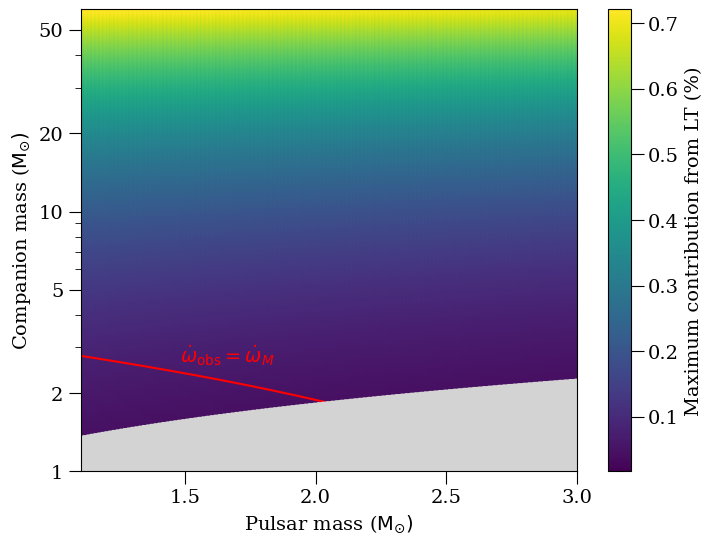

In [11]:
fig,ax = plt.subplots(figsize=(8,6))
plt.style.use('default')


params = {"font.size": 14,
         "font.family": 'serif', 
         "xtick.labelsize" : 14,
         "ytick.labelsize" : 14,
          "xtick.major.size": 9,
         "xtick.minor.size": 4,
         "ytick.major.size": 9,
         "ytick.minor.size": 4,
         }
plt.rcParams.update(params)


# Plotting the maximum contribution to the observed omega-dot
df=pd.DataFrame(data={'A':pul_val,'B':comp_val,'C':ratio_value})

points = plt.scatter(df.A, df.B, c=df.C,cmap="viridis")

m = cm.ScalarMappable(cmap=cm.turbo)
m.set_array(df['C'])
plt.colorbar(points, label ='Maximum contribution from LT (%)')

ax.set_xlabel(r'Pulsar mass ($\mathrm{M}_{\odot})$')
ax.set_ylabel(r'Companion mass ($\mathrm{M}_{\odot})$')

ax.set_yscale('log')
ax.set_yticks([1,2,5,10,20,50])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_xticks([1.5,2.0,2.5,3.0])


ax.plot(pul_val,mc_omdot,zorder=1,color='red',label=r'$\dot \omega$')

# place a text box to specify observed omega-dot value
ax.text(0.2, 0.28, r'$\dot\omega_{\mathrm{obs}} = \dot\omega_{M}$', transform=ax.transAxes, 
        color ='red', fontsize=14, verticalalignment='top')


# For the grey region to show the non-allowed pulsar and companion masses
plt.plot(mp,mc_na,color='lightgray')
plt.fill_between(mp, 0, mc_na,facecolor='lightgray',zorder=2)


plt.ylim(1.0,np.max(comp_val))
plt.xlim(1.1,3.0)


plt.show()